# Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
from sklearn.model_selection import cross_val_score

## Load Data Set 

In [2]:
os.chdir('D:\PeerLoanKart')


In [3]:
df= pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### Data Checks  

In [4]:
df.shape

(9578, 14)

In [5]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

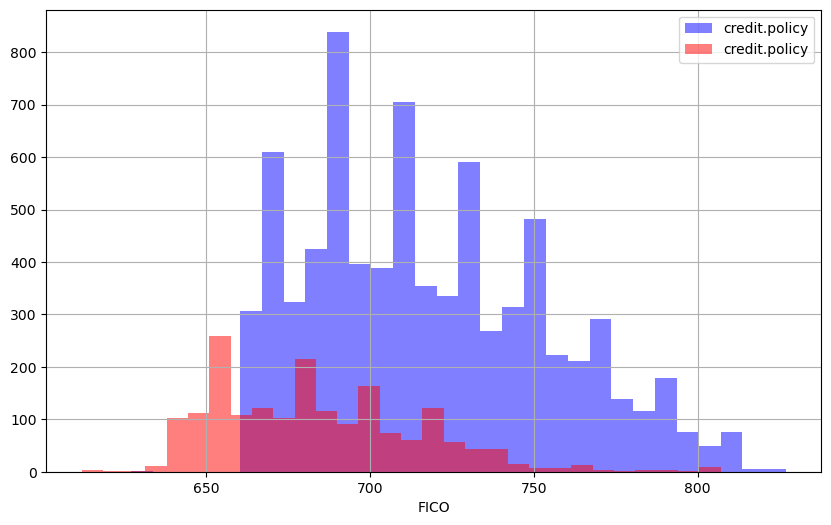

In [9]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color ='b',
                                       bins=30,label='credit.policy')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color ='r',
                                       bins=30,label='credit.policy')
plt.legend()
plt.xlabel('FICO')
plt.savefig('histogram of two FICO distributions on credit policy')

#### Relation between not.fully.paid and fico (credit rating) 

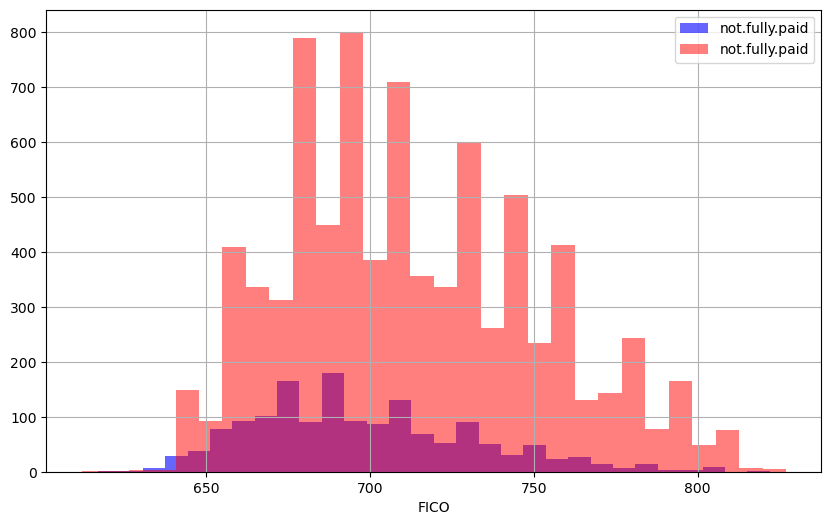

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.6,color='b',
                                        bins=30,label='not.fully.paid')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='r',
                                        bins=30,label='not.fully.paid')
plt.legend()
plt.xlabel('FICO')
plt.savefig('histogram of two FICO distributions')

#### Create a count plot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid

<AxesSubplot:xlabel='purpose', ylabel='count'>

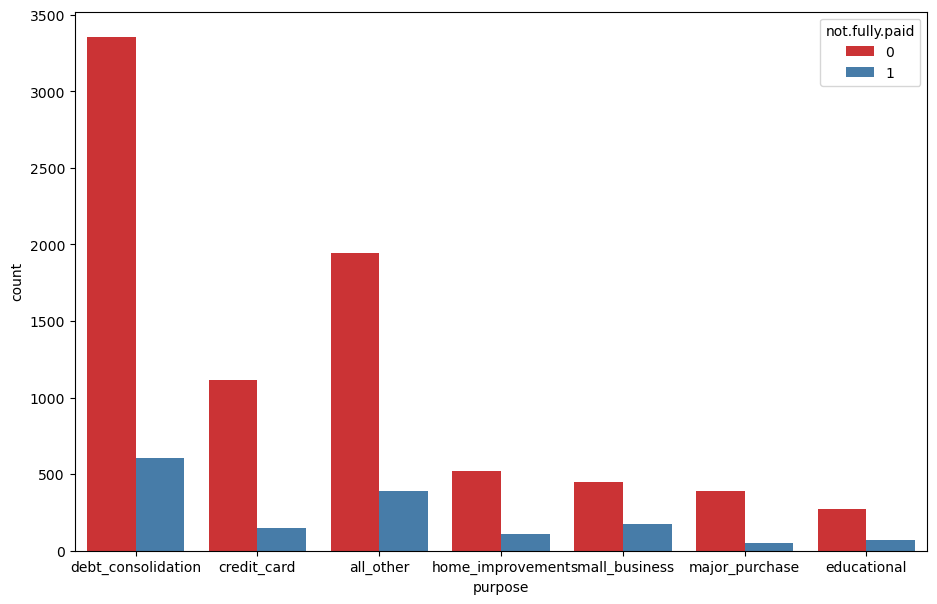

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')


#### Data Checks - Check number of columns with type Object for Label . One hot encoding 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### One hot encoding column – purpose  


In [17]:
final_data = pd.get_dummies(df,columns= cat_feats,drop_first =True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


#### Category Columns 

In [16]:
cat_feats =['purpose']
cat_feats

['purpose']

#### Check Number of columns, number of columns increased   

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

#### Create variable X and Y , the train test split. 

In [19]:
x= final_data.drop('not.fully.paid',axis=1)
y= final_data['not.fully.paid']
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=22)


In [20]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [21]:
co_rel=x.corr()
display(co_rel)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


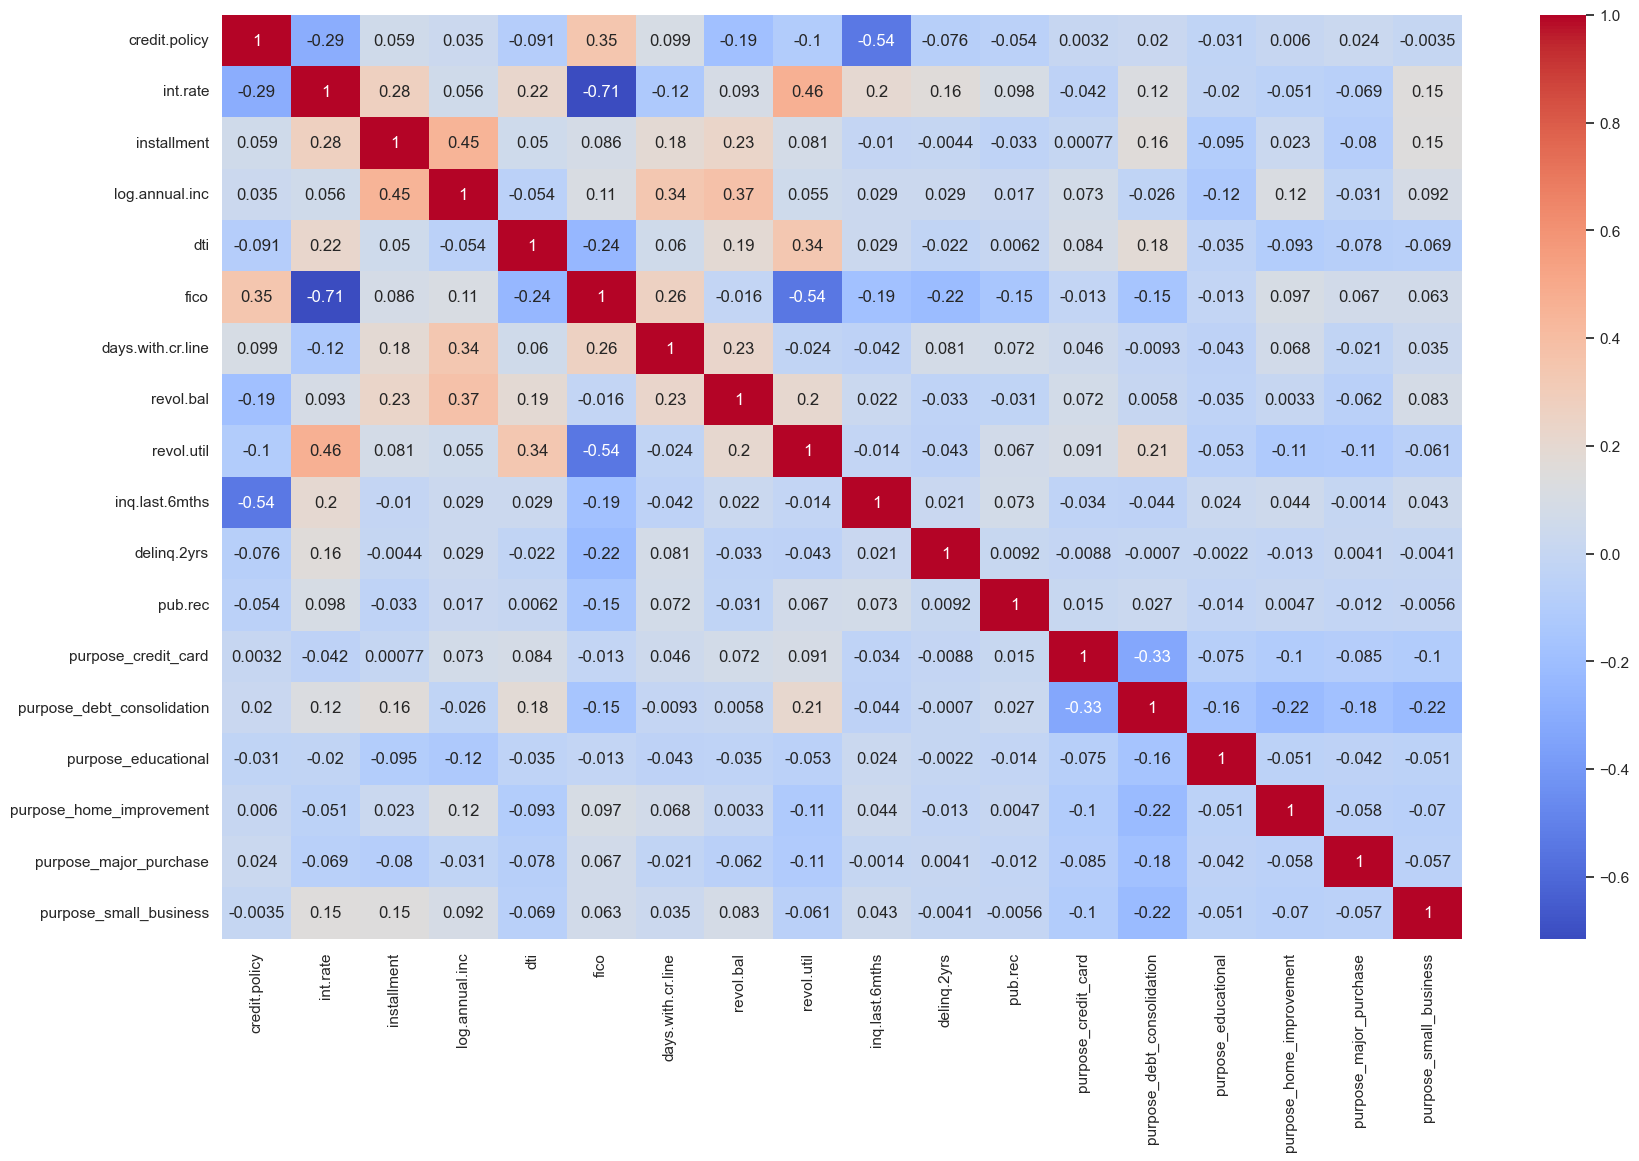

<Figure size 2000x1200 with 0 Axes>

In [22]:
plt.rcParams['figure.figsize']=(20,12)
sns.set(font_scale=1)
sns.heatmap(co_rel,cmap='coolwarm',annot=True)
plt.show()
plt.savefig('Heatmap.png')

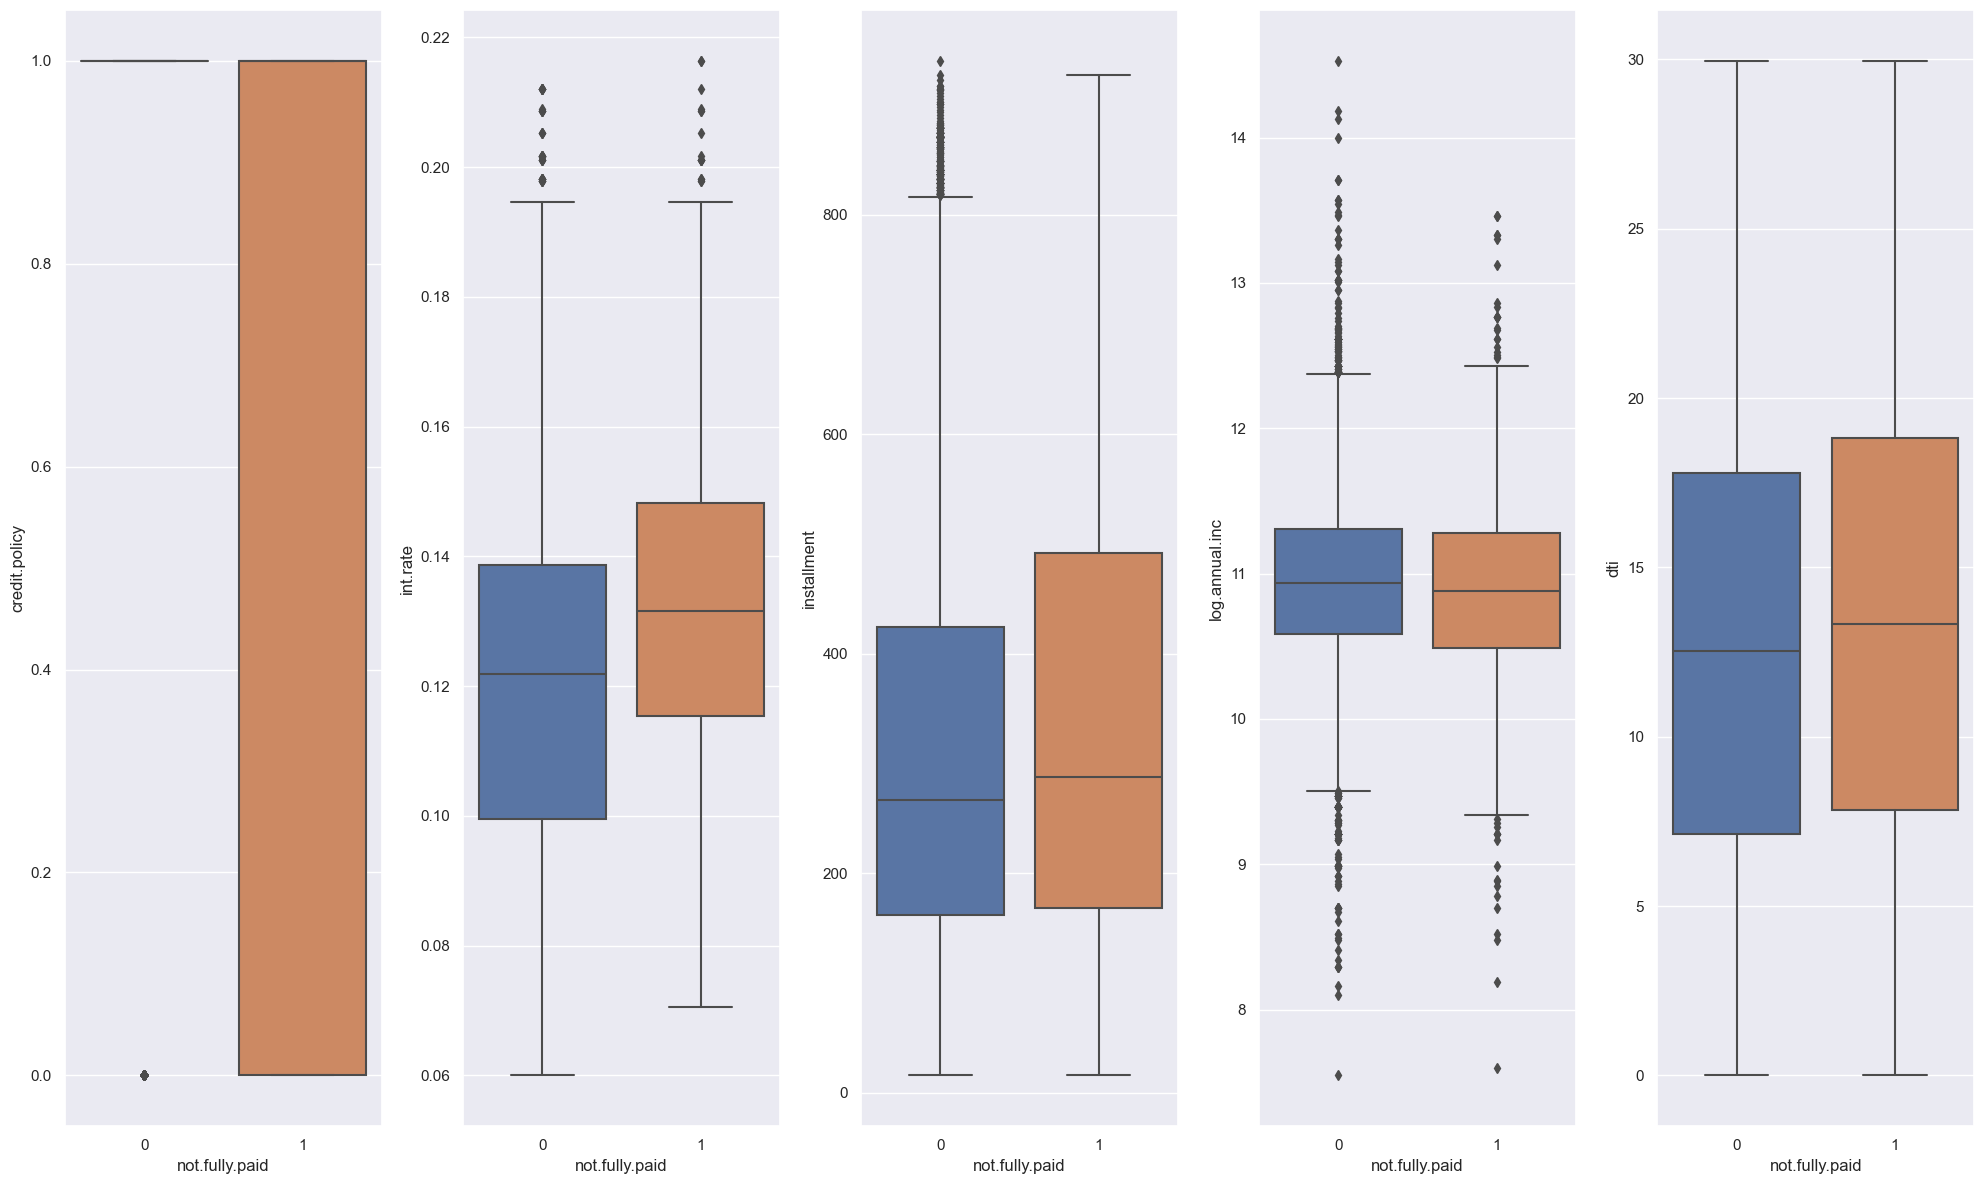

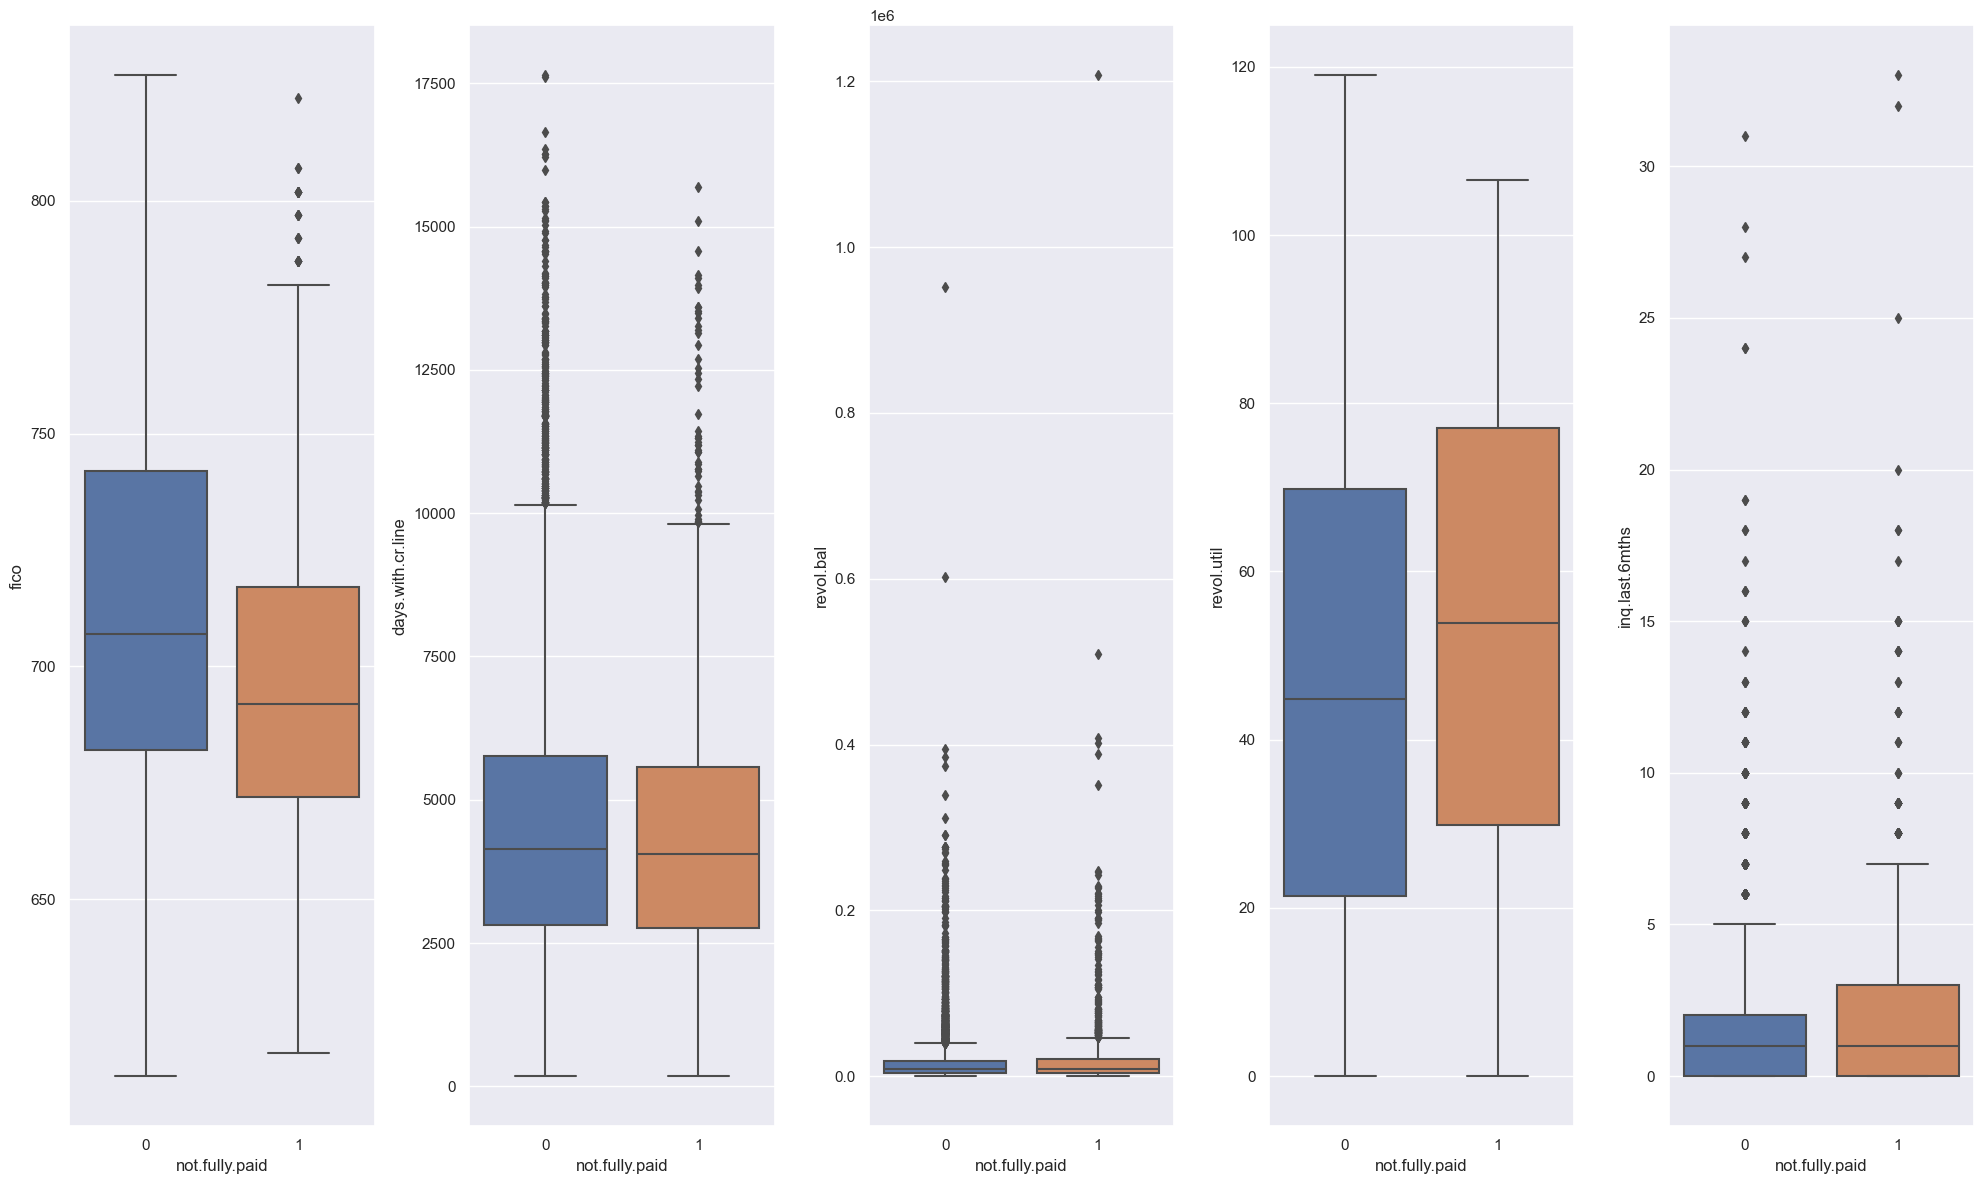

In [23]:
plt.rcParams['figure.figsize']=(20,12)
f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5)
sns.boxplot ( x= df['not.fully.paid'], y = df['credit.policy'], ax = ax1)
sns.boxplot (x= df['not.fully.paid'], y = df['int.rate'], ax = ax2)
sns.boxplot (x= df['not.fully.paid'], y = df['installment'], ax = ax3)
sns.boxplot (x= df['not.fully.paid'], y = df['log.annual.inc'] , ax = ax4)
sns.boxplot (x= df['not.fully.paid'], y = df['dti']  , ax = ax5)
f .tight_layout()

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['not.fully.paid'], y = df['fico'], ax = ax1)
sns.boxplot (x= df['not.fully.paid'], y = df['days.with.cr.line'] , ax = ax2)
sns.boxplot (x= df['not.fully.paid'], y = df['revol.bal'] , ax = ax3)
sns.boxplot (x= df['not.fully.paid'], y = df['revol.util'], ax = ax4)
sns.boxplot (x= df['not.fully.paid'], y = df['inq.last.6mths'] , ax = ax5)
f .tight_layout()


#### Create Decision Tree 

In [24]:
DC = DecisionTreeClassifier()
DC.fit(xtrain,ytrain)

DecisionTreeClassifier()

#### Predictions 

In [25]:
ypred = DC.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Check Accuracy  

In [26]:

print (accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))


0.7296450939457203
[[1996  383]
 [ 394  101]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2379
           1       0.21      0.20      0.21       495

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.73      0.73      0.73      2874



#### Create Random Forest  

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=600)

In [30]:
RC = RandomForestClassifier(n_estimators=600)
RC.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=600)

#### Predictions

In [31]:
ypred = RC.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Check Accuracy  

In [32]:
print (accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8281141266527487
[[2375    4]
 [ 490    5]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2379
           1       0.56      0.01      0.02       495

    accuracy                           0.83      2874
   macro avg       0.69      0.50      0.46      2874
weighted avg       0.78      0.83      0.75      2874



#### Create ExtraTrees Classifier

In [33]:
EC= ExtraTreesClassifier(n_estimators=600)
EC.fit(xtrain,ytrain)

ExtraTreesClassifier(n_estimators=600)

#### Prediction

In [34]:
ypred = EC.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Checking Accuracies

In [35]:

print (accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

0.8291579679888657
[[2369   10]
 [ 481   14]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2379
           1       0.58      0.03      0.05       495

    accuracy                           0.83      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.79      0.83      0.76      2874



# GridSearchCV
#### Defining the Function for the ML algorithms using GridSearchCV Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.

In [36]:
def FitModel (x,y,algo_name,algorithm, gridsearchParams,cv):
    np.random.seed(10)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
    grid=GridSearchCV(estimator=algorithm, param_grid = gridsearchParams,
                     cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
    grid_result = grid.fit(xtrain,ytrain)
    best_params = grid_result.best_params_
    pred =  grid_result.predict(xtest)
    cm = confusion_matrix (ytest,pred)
    print (pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(ytest,pred))
    print ('Accuracy Score', (accuracy_score(ytest,pred)))
    print ('Confusion Matrix :\n',cm)


In [37]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

#### SVC using GridSearchCV

In [39]:
param = {
            'C': [1,100],
            'gamma':[1, 3,5,10, 100]
         }

FitModel (x,y,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[0 0 0 ... 0 0 0]
Best Params : {'C': 1, 'gamma': 1}
Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1603
           1       0.00      0.00      0.00       313

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.70      0.84      0.76      1916

Accuracy Score 0.8366388308977035
Confusion Matrix :
 [[1603    0]
 [ 313    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestClassifier using GridSearchCV

In [40]:
param = {'n_estimators':[100,500,1000]}
FitModel(x,y,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[0 0 0 ... 0 0 0]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1603
           1       0.60      0.02      0.04       313

    accuracy                           0.84      1916
   macro avg       0.72      0.51      0.47      1916
weighted avg       0.80      0.84      0.77      1916

Accuracy Score 0.8376826722338204
Confusion Matrix :
 [[1599    4]
 [ 307    6]]


In [41]:
np.random.seed(10)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
forest = RandomForestClassifier(n_estimators=500)
fit= forest.fit(xtrain,ytrain)
accuracy=fit.score(xtest,ytest)
predict=fit.predict(xtest)
cmatrix=confusion_matrix(ytest,predict)
print ('Classification Report:',classification_report(ytest,predict))
print ('Accuracy Score', (accuracy_score(ytest,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)

Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1603
           1       0.67      0.01      0.03       313

    accuracy                           0.84      1916
   macro avg       0.75      0.51      0.47      1916
weighted avg       0.81      0.84      0.77      1916

Accuracy Score 0.8376826722338204
Accuracy of Random Forest  0.8376826722338204
Confusion Matrix :
 [[1601    2]
 [ 309    4]]


In [42]:
importances = forest.feature_importances_
indices=np.argsort(importances)[::-1]
print('Feature Ranking.')
for f in range (x.shape[1]):
    print('Feature %s(%f)' %(list(x)[f],importances[indices[f]]))

Feature Ranking.
Feature credit.policy(0.116096)
Feature int.rate(0.115117)
Feature installment(0.113047)
Feature log.annual.inc(0.111964)
Feature dti(0.110481)
Feature fico(0.109301)
Feature days.with.cr.line(0.104158)
Feature revol.bal(0.078832)
Feature revol.util(0.052465)
Feature inq.last.6mths(0.014917)
Feature delinq.2yrs(0.014782)
Feature pub.rec(0.013759)
Feature purpose_credit_card(0.009662)
Feature purpose_debt_consolidation(0.009109)
Feature purpose_educational(0.007952)
Feature purpose_home_improvement(0.007009)
Feature purpose_major_purchase(0.006745)
Feature purpose_small_business(0.004602)


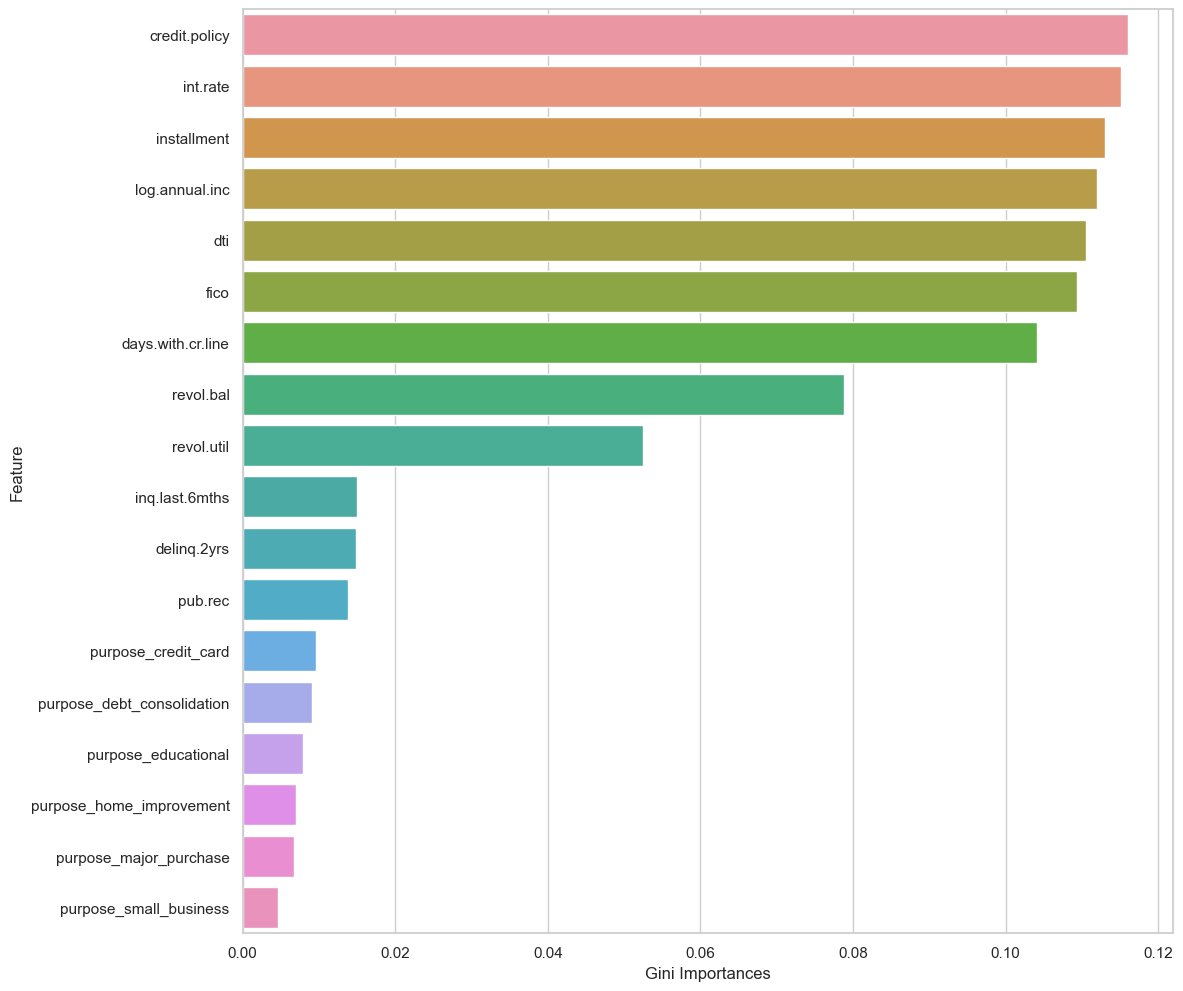

<Figure size 1200x1200 with 0 Axes>

In [43]:
feat_imp = pd.DataFrame({'Feature':list(x),'Gini importance':
                        importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
sns.set_style('whitegrid')
ax=sns.barplot(x='Gini importance',y = 'Feature',data=feat_imp)
ax.set(xlabel='Gini Importances')
plt.show()
feat_imp.index=feat_imp.Feature
plt.savefig('feat_imp')

#### Using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm=SMOTE(random_state=42)
xres,yres=sm.fit_resample(x,y)

In [46]:
display(yres.value_counts())

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [47]:
param={'n_estimators':[100,500,1000]}
FitModel(xres,yres,'RandomForest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[0 1 0 ... 0 0 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1624
           1       0.88      0.83      0.86      1594

    accuracy                           0.86      3218
   macro avg       0.86      0.86      0.86      3218
weighted avg       0.86      0.86      0.86      3218

Accuracy Score 0.8607830950901181
Confusion Matrix :
 [[1443  181]
 [ 267 1327]]


### "With respect to feature Importance of the independent variable reducing the dimensions of independent variable for reducing the complexity of model fitting."

In [49]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[:15].index
display (type(feat_to_keep),feat_to_keep)

pandas.core.indexes.base.Index

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational'],
      dtype='object', name='Feature')

### "Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the Random Forest Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest_resample.

In [52]:
X_res = pd.DataFrame(xres)
Y_res = pd.DataFrame(yres)
X_res.columns = x.columns
param = { 'n_estimators': [100,500,1000]  }
FitModel (xres [feat_to_keep], yres ,'Random Forest_resample',RandomForestClassifier(), param, cv =10)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[0 1 0 ... 0 0 1]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1624
           1       0.87      0.84      0.85      1594

    accuracy                           0.86      3218
   macro avg       0.86      0.86      0.86      3218
weighted avg       0.86      0.86      0.86      3218

Accuracy Score 0.8567433188315724
Confusion Matrix :
 [[1416  208]
 [ 253 1341]]


#### "Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the Support Vector Machine Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC_resample."



In [53]:
param = { 'C': [1,100,1000],
        'gamma':[1, 3,5,10, 100,1000]
         }
FitModel (xres [feat_to_keep], yres,'SVC_resample',SVC(), param, cv =5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[1 1 1 ... 1 1 1]
Best Params : {'C': 1, 'gamma': 1}
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1624
           1       0.50      1.00      0.66      1594

    accuracy                           0.50      3218
   macro avg       0.25      0.50      0.33      3218
weighted avg       0.25      0.50      0.33      3218

Accuracy Score 0.4953387197016781
Confusion Matrix :
 [[   0 1624]
 [   0 1594]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### "Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the XGBoost Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XGBoost_resample."



In [55]:
param ={'n_estimators':[100,500,1000]}
FitModel(xres[feat_to_keep],yres,'XGBOOST',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[1 1 0 ... 0 0 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1624
           1       0.89      0.85      0.87      1594

    accuracy                           0.87      3218
   macro avg       0.88      0.87      0.87      3218
weighted avg       0.88      0.87      0.87      3218

Accuracy Score 0.8741454319453077
Confusion Matrix :
 [[1463  161]
 [ 244 1350]]


#### "Loading the pickle file with the algorithm which gives highest accuracy score"



In [56]:
model =pickle.load(open("Random Forest","rb"))

### "Predicting the independent variable using the loaded pickle file and getting the accuracy score and best parameters of the loaded pickle file."



In [57]:
pred1 = model.predict (xtest)
print (accuracy_score (pred1,ytest))
print(model.best_params_)

0.8376826722338204
{'n_estimators': 100}
